# Gradient Descent

Finding the minima of general functions represents an extremely important task in many use cases of applied mathematics. The most notable example comes in the field of Machine Learning, where, in general, we start with set of training observations, $X$ along with a response variable $y$ and we try to find a Machine Learning model, which is just a function $f(X, \theta)$ depending on certain parameters $\theta$, that tries to approximate $y$ as best as possible.

These are known as **supervised** problems, because we have a set of true responses, $y$ for our training data. The task here is to find the parameters $\theta$ that minimize our 'error', which is the difference between $f(X,\theta)$ and $y$ (in the literature, this error is computed with an extra function called a **loss function**). As you can see, minimizing the error function is crucial to train a meaningful Machine Learning model. And this is only an example of the need to minimize a target function, there are other fields such as Finance or Economics where minima localization algorithms are needed.

So, finding function minima seems to be very important, but, how to we find these minima for functions in general? If you recall from Calculus the local minima of a function are attained where the gradient of this function equals zero. In practice this is not the only option, and we can count with a clever algorithm to find these minima, called **Gradient Descent**. We will study the basics of this algorithm and its variants in this section, as well as provide some examples of how to apply it.

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/gradient.png" alt="gradient" style="width:400px; margin:auto;"/>

## Useful links
Here are some extra resources you can find in the web that talk about this topic. \
*These links are external and we don't take responsibility for any downtime or incovenient caused by them.*

- [Utah Gradient Descent notes](https://users.cs.utah.edu/~jeffp/IDABook/T6-GD.pdf)
- [Real Python: Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)
- [Stat Quest Gradient Descent](https://www.youtube.com/watch?v=sDv4f4s2SB8)

## Let's review the theory

You have a real-valued function $f: \mathbb{R}^n \to \mathbb{R}$ (possibly multivariate), and you want an $x_0 \in \mathbb{R}^n$ which is a local minimum of $f(x)$. This means that there is a neighborhood $B_{\epsilon}(x)$ in which $f(x)$ attains a minimum at $x_0$. For example, in the next figure we can see that the approximate point $(1.577, -1.385)$ is a local minima of $f(x)$, because is a minimum in the neighborhood $]1,2[$ (highlighted in yellow).

Note that this point is not a *global* minimum of this function, that is, is not the point at which $f(x)$ has a minimal value overall, because $f(x)$ decreases as $x$ moves to $-\infty$. We are interested in finding *local* minima for the problem that concerns us today. If a point is a global minimum, then it is also, trivially, a local minimum as well.

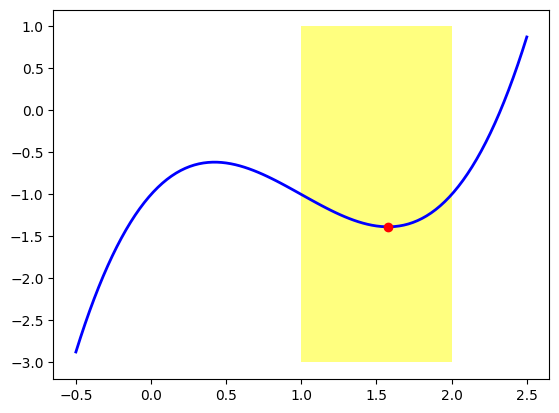

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

xx = np.linspace(-0.5, 2.5, 100)
fx = [x**3 -3*x**2 +2*x -1 for x in xx]

ax = plt.gca()
rect = Rectangle((1,-3), 1, 4, fc='yellow', alpha=0.5)
ax.add_patch(rect)

plt.plot(xx, fx, linewidth=2, color='b')
plt.plot(1.577, -1.385, "or")
plt.show()

Now, how to we find this point? As we saw in Calculus 101 at college, we can compute the gradient of $f(x)$ and find points at which this gradient is zero. Remember that for a differentiable function $f:\mathbb{R}^n \to \mathbb{R}$, its gradient is given by the vector
$$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \cdots, \frac{\partial f}{\partial x_n}\right),
$$
formed by the partial derivatives of $f(x)$. In $n=1$ dimensions, this is just the derivative $\nabla f(x) = f'(x)$.

### Using `np.gradient`

### Gradient descent algorithm

## Stochastic gradient descent

...

## Other variants of gradient descent

...

## Applications and examples

...